 <h1><center> INTERACTIVE AND LIVE PLOTTING </center></h1>

## 1. INTERACTIVE PLOTTING

### 1.1. SETUP

Before starting, it is necessary to load the modules that will allow performing interactive plotting, and to activate the extension.

From the Anaconda3 Prompt, we will have to run two commands.

-  pip.install ipywidgets

-  jupyter nbestension enable --py widgetsnbextension

Asimismo, es recomendable visitar el canal:

http://youtube.com/watch?v=rkBPgTL-D3Y&t=330s


### 1.2. SMART INTERACTIVE BUILDER

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

- %matplotlib is a magic function in IPython.

- %matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=100


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### 1.2.1 SLIDER

We define a function and to facilitate the comparative exercises, we set the size of the vertical axis

In [4]:
def f(x):
    plt.plot(np.arange(0,10), x*np.arange(0,10))
    plt.ylim(-30,30)
    plt.grid(True)
    plt.title('Interactive Plot')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

Without having to do anything else, we can define a function


In [5]:
interact(f, x=(-3,3,0.5))

interactive(children=(FloatSlider(value=0.0, description='x', max=3.0, min=-3.0, step=0.5), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

In [6]:
def g(x):
    plt.plot(np.arange(0,100), np.sin(x*np.arange(0,100)))
    plt.ylim(-np.pi,np.pi)
    plt.grid(True)
    plt.title('Interactive Plot')
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

In [7]:
# We set the lower and upper bound and the step for the variable
interact(g, x=(-10.0,10.0, 0.1))

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, min=-10.0), Output()), _dom_classes=('widget-interact',))

<function __main__.g>

### 1.2.3. BOOLEAN TICKER BOX

In [8]:
def f(x):
    rands = np.random.rand(100)
    if x:
        plt.plot(rands, 'r-+')
    else:
        plt.plot(rands, 'b--')


The package is capable of understanding the type of variable that is supplied.
If it is a boolean, then instead of a slider we will see a box

In [9]:
interact(f,x=True)

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

### 1.2.4. DECORATORS

We can have also the capacity to modify the title interactively

In [10]:
@interact(x="Title of the Plot")

def f(x):
    plt.title(x)

interactive(children=(Text(value='Title of the Plot', description='x'), Output()), _dom_classes=('widget-interact',))

### 1.2.5 MULTIPLE WIDGETS

The package is also capable of discovering multiple widgets.

In [11]:
def f(a,b):
    plt.plot(np.arange(0,10), a*np.power(np.arange(0,10),b))
    plt.title('Power Law= $x=ay^b$')

In [12]:
interact(f, a=(1,3,.05), b=(0,3,0.05))

interactive(children=(FloatSlider(value=2.0, description='a', max=3.0, min=1.0, step=0.05), FloatSlider(value=1.0, description='b', max=3.0, step=0.05), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

### 1.2.6. DROPDOWNS

In [13]:
def f(colour):
    plt.plot(np.arange(0,10), np.power(np.arange(0,10), 5), c=colour)
    plt.title("Power Law: $y=ax^b$")
    plt.grid()
    
colours=['red','green','blue']


interact(f, colour= colours)


interactive(children=(Dropdown(description='colour', options=('red', 'green', 'blue'), value='red'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

In [14]:
def f(pow):
    plt.plot(np.arange(0,10), np.power(np.arange(0,10), pow))
    plt.title("Power Law: $y=x^{}$".format(pow))
    plt.grid()
    
powers={'one':1, 'two':2, 'three':3}

In [15]:
interact(f, pow=powers)

interactive(children=(Dropdown(description='pow', options={'one': 1, 'two': 2, 'three': 3}, value=1), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

## 2. LIVE PLOTS

### 2.1.  EMBEDDING ANIMATIONS IN JUPYTER

***A VEY IMPORTANT WARNING*** USERS OF WINDOWS 10 WILL HAVE TO INSTALL THE FFMPEG BUILDERS IN THE ENVIRONMENT OF THE OPERATING SYSTEM 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

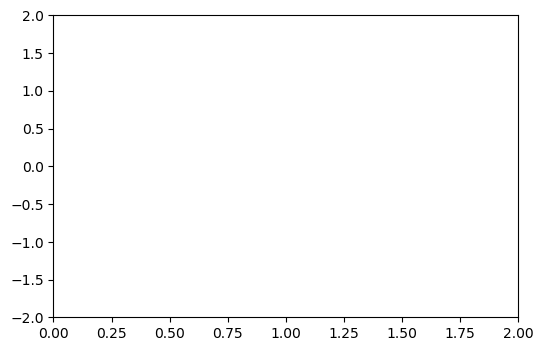

In [8]:
fig, ax=plt.subplots()
ax.set_xlim((0,2))
ax.set_ylim((-2,2))

# This is the plot element that we will work with
line, = ax.plot([],[], lw=2)

In [9]:
# Initialization function: plot the background of each frame
def init():
    line.set_data([],[])
    return (line,)

In [10]:
# Animation Function, which is called sequentially
def animate(i):
    x=np.linspace(0,2,1000)
    y=np.sin(2*np.pi*(x-0.01*i))
    line.set_data(x,y)
    return (line,)

In [11]:
# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20)

In [12]:
HTML(anim.to_html5_video())

### 2.2. ANOTHER EXAMPLE OF ANIMATION

A recommended reference for this section is at Schaffer,C. (2019): Plotting Live Data in Real Time

https://www.youtube.com/watch?v=Ercd-Ip5PfQ 

In [3]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=100

We will use the **count**  function from the ***itertools*** library

- This library helps in iterations

- For further reference, https://docs.python.org/2/library/itertools.html

- In our exercise below, we will induce an iteration with the variable index, everytime it is used, then we go back to the iterator.

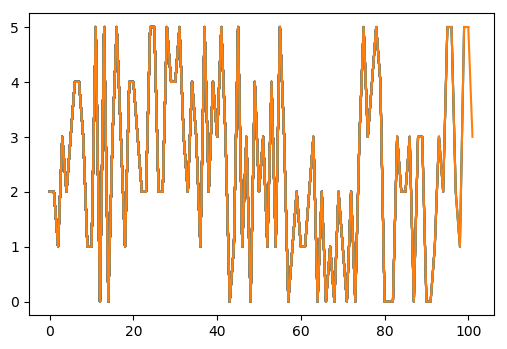

In [5]:
x_vals=[]
y_vals=[]

index=count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0,5))
    plt.plot(x_vals, y_vals)
    
ani=FuncAnimation(plt.gcf(), animate, interval=1000)
HTML(ani.to_html5_video())


### 2.3. GENERATING A DYNAMIC CSV FILE

This file has to be executed in parallel in a separate workbook, but simultaneously to the animation that is presented below.
This is a proxy of a live data stream that is updated every few seconds.

In [6]:
import csv
import random
import time

def create_live_series():
    
    n=0
    x_value = 0
    total_1 = 1000
    total_2 = 1000

    fieldnames = ["x_value", "total_1", "total_2"]


    with open('data.csv', 'w') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        csv_writer.writeheader()

    #while True:
    while n<100:

        with open('data.csv', 'a') as csv_file:
            csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

            info = {
                "x_value": x_value,
                "total_1": total_1,
                "total_2": total_2
            }

            csv_writer.writerow(info)
            print(n,x_value, total_1, total_2)

            n +=1
            x_value += 1
            total_1 = total_1 + random.randint(-6, 8)
            total_2 = total_2 + random.randint(-5, 6)

            time.sleep(3)

### 2.4. PLOTTING A LIVE DATA STREAM

Running this example requires running simultaneously the dynamic csv file referend in the avbove parragraph.

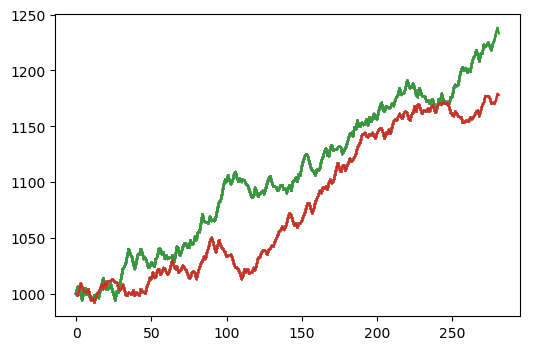

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import random
from itertools import count
import pandas as pd



x_vals = []
y_vals = []

index = count()

def animate(i):
    j=index
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    #plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

   # plt.legend(loc='upper left')


ani=FuncAnimation(plt.gcf(), animate, interval=60)
HTML(ani.to_html5_video())


http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/ 